## Task:  classify origin of wine based on physio-chemical analysis data. 

You are provided data that are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Details can be [**found here**](http://archive.ics.uci.edu/ml/datasets/Wine).

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read in the data 

#### Data set

In [11]:
df = pd.read_csv('../data/wine.data.csv', header=None)
df.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


#### Describe the basic statistics of the features

#### Make boxplots by output labels/classes - do any features classify the wine based on these figures?

If so (and hint, they do!), make a scatter plot showing the correlation of two features showing the correlation of two features and class separation by these features

####  Naive Bayes Classification

Use [Naive Bayes Classification](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) to create a model to classify wine base on attributes.  Justify how good the model is for the wine classification.  Note that some of the metrics we've used in class are only for *binary* classifications, so may not eb applicable here.


In [12]:
df.shape

(178, 14)

Text(0.5, 0.98, '')

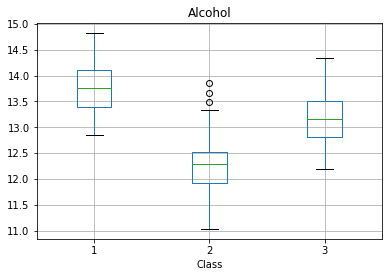

In [21]:
boxplot1 = df.boxplot(by = 'Class',column = ['Alcohol'])#,'Malic acid','Magnesium'])
plt.suptitle('')

Text(0.5, 0.98, '')

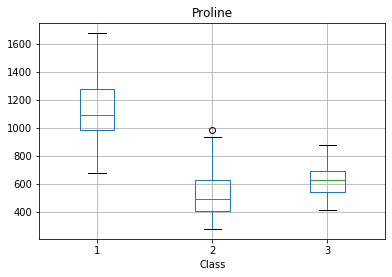

In [28]:
boxplot1 = df.boxplot(by = 'Class',column = ['Proline'])#,'Malic acid','Magnesium'])
plt.suptitle('')

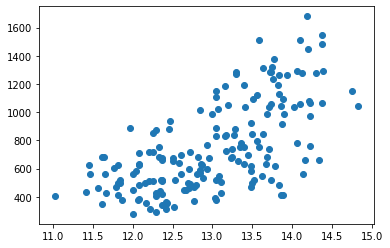

In [29]:
plt.scatter(df['Alcohol'],df['Proline'])

After looking at boxplots and scatter plots we can see that many features are able to separate different classes of wine. And the features also appears to be correlated to each other. Next we will separate the labels and features into 2 different matrices and then we will divide data in test and train sets.

In [110]:
wine_labels = df['Class']
wine_labels

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64

In [111]:
wine_features = df.drop(columns=['Class'])
wine_features

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine_features, wine_labels, test_size=0.3,random_state=1) 

In [124]:
y_test.shape

(54,)

We will use Gaussian Naive Bayes model to train on this data set. It uses relative probability to classify data. 

In [113]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [125]:
y_pred = clf.predict(X_test)

In [126]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9814814814814815


Accuracy of the model is 98% when tested with test data.

In [127]:
cm = metrics.confusion_matrix(y_test, y_pred)
cmdf = pd.DataFrame(cm,index=['1', '2', '3'], columns=['1', '2', '3'])
cmdf

,1,2,3
1,23,0,0
2,1,18,0
3,0,0,12


Confusion matrix tells us about how many were classified correctly and how many were wrongly classified. The columns tells us about the predicted classes and row tells us about the actual classes. Looking at the matrix the model was really good with only one error where it was identified as class 1 wine whereas it was a class 2 wine.

In [116]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        24
           2       0.95      1.00      0.97        18
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



In [117]:
y_pred_prob = clf.predict_proba(X_test)[:,1]
y_pred_prob

array([7.66483127e-06, 9.99999952e-01, 8.72445869e-06, 1.00000000e+00,
       5.94168840e-13, 1.75566399e-06, 1.00000000e+00, 2.49619650e-18,
       3.16228670e-08, 9.99989656e-01, 3.85335982e-09, 2.60863443e-02,
       9.99999996e-01, 4.22426637e-09, 9.99999647e-01, 1.00000000e+00,
       1.66179636e-05, 8.43899066e-06, 1.00000000e+00, 4.00995810e-15,
       1.50696899e-10, 9.99999740e-01, 2.58375037e-02, 2.86902901e-01,
       2.01776382e-06, 3.79444957e-05, 2.83065989e-08, 3.89790503e-07,
       2.33734285e-12, 2.19741154e-10, 9.99996926e-01, 3.08173044e-16,
       3.83829969e-15, 6.74712278e-16, 9.99975001e-01, 9.99999742e-01,
       9.99999824e-01, 9.73791449e-01, 9.99999992e-01, 2.91472533e-09,
       2.66911105e-08, 1.00000000e+00, 8.66283960e-09, 9.87512408e-06,
       1.30350235e-09, 1.56690100e-04, 9.99998120e-01, 2.82856630e-07,
       8.48669480e-21, 5.97030642e-12, 1.00000000e+00, 1.93612898e-15,
       8.09212550e-12, 8.14020093e-11])

In [80]:
y_t = y_test.ravel()

In [120]:
from sklearn.preprocessing import label_binarize
y_b = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y.shape[1]

In [104]:
from sklearn.metrics import roc_curve,auc

In [121]:
fpr = dict()
tpr = dict()
roc_auc = dict()
thresholds = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_b[:, i], y_pred_prob)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [122]:
roc_auc

{0: 0.1753155680224404, 1: 1.0, 2: 0.2996031746031746}

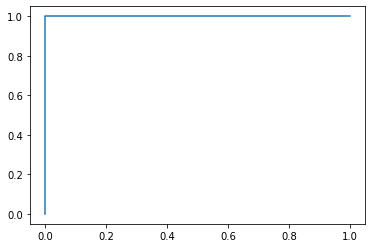

In [106]:
plt.plot(fpr[1], tpr[1], label='ROC curve')

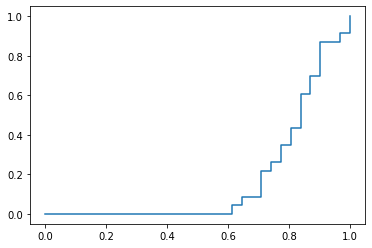

In [107]:
plt.plot(fpr[0], tpr[0], label='ROC curve')

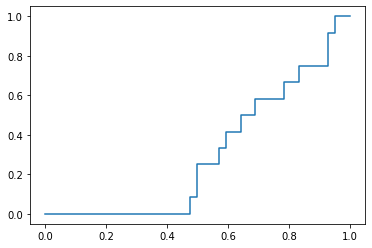

In [109]:
plt.plot(fpr[2], tpr[2], label='ROC curve')

ROC curves maybe not be correct. I tried looking up the documentation for creating them for multiclass data. I converted the classes into binary classes but the probabilities should also be divided for different classes. I tried using the same probability for the binarized classes. The plots above are the plot which I got. 